Importing Required Packages

In [2]:
import re
import string
import random
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#from wordcloud import WordCloud

Data Collection and Data Processing

In [2]:
# loading the dataset to a pandas DataFrame
resumeData = pd.read_csv('ResumeDataSet.csv')

In [3]:
# number of rows and columns in the dataset
resumeData.shape

(962, 2)

In [4]:
# printing first five rows oof the DataFrame
resumeData.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
# printing last five rows of the DataFrame
resumeData.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
# columns of the dataframe
resumeData.columns

Index(['Category', 'Resume'], dtype='object')

In [7]:
# checking any null values in the dataset
resumeData.isnull().sum()

Category    0
Resume      0
dtype: int64

In [8]:
# printing first value of the category column
resumeData.Category[0]

'Data Science'

In [9]:
# printing first value of the resume column
resumeData.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
# number of unique categories 
uniqueCategories = resumeData.Category.nunique()
uniqueCategories

25

In [11]:
# unique categories names
resumeData.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
# value counts for each category
resumeData['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Sales                        40
Data Science                 40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

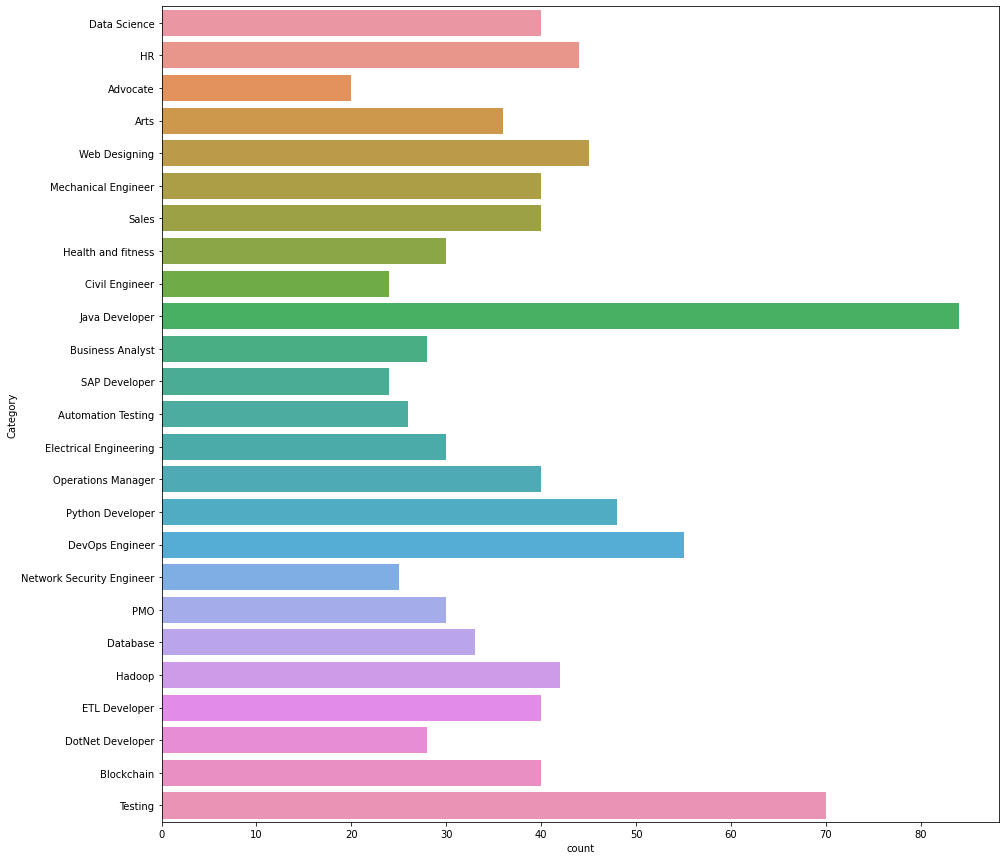

In [13]:
# bar plot for category column to show how many value each category has
plt.figure(figsize=(15,15))
sns.countplot(y = 'Category', data = resumeData)
plt.show()

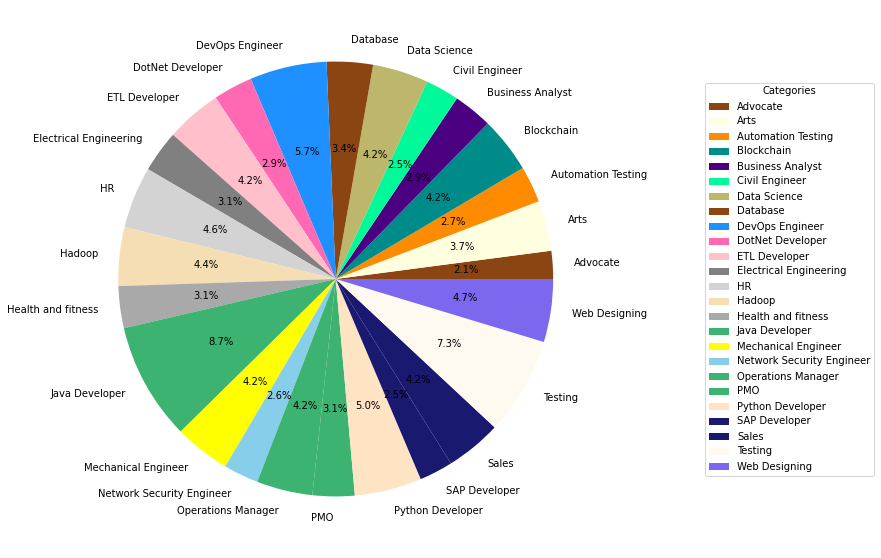

In [14]:
# pie chart for value distribution in percentages for each category
unique_category, counts_of_category = np.unique(resumeData['Category'], return_counts=True)
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = uniqueCategories)
plt.figure(figsize=(10,10))
plt.pie(x=counts_of_category, labels=unique_category, autopct='%1.1f%%', colors=colors)
plt.legend(title = 'Categories', loc = 'center right', bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [15]:
# function for cleaning the text
def cleanResumeText(resumeText):
  resumeText = re.sub('http\S+\s*', ' ', resumeText)                                                 # remove URLs
  resumeText = re.sub('RT|cc', ' ', resumeText)                                                      # remove RT and cc  
  resumeText = re.sub('#\S+', ' ', resumeText)                                                       # remove hashtags
  resumeText = re.sub('@\S+', ' ', resumeText)                                                       # remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)   # remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)                                             # remove consecutive non-ASCII characters
  resumeText = re.sub('\s+', ' ', resumeText)                                                        # remove extra whitespaces
  return resumeText

resumeData['cleanedText'] = resumeData.Resume.apply(lambda x: cleanResumeText(x))

In [16]:
# printing the first five rows of the DataFrame
resumeData.head()

,Category,Resume,cleanedText
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [18]:
# stopwords
setOfStopWords = stopwords.words('english')

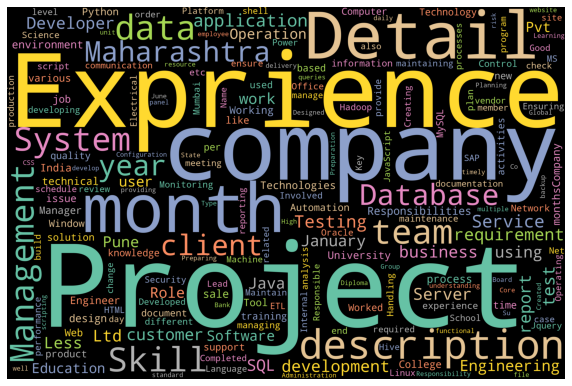

In [19]:
# wordcloud for visualization of the frequently occuring words in the corpus
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', colormap='Set2', collocations=False, 
                      stopwords=setOfStopWords).generate(' '.join(resumeData['cleanedText']))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
# function for finding most frequent words from the text
def mostCommonWordsFromText():
  totalWords = []
  sentences = resumeData.cleanedText.values
  for index in range(len(sentences)):
    sentenceWords = nltk.word_tokenize(sentences[index])
    for word in sentenceWords:
      if word not in setOfStopWords and word not in string.punctuation and not word.isnumeric():
        totalWords.append(word)
  
  wordFreqDist = nltk.FreqDist(totalWords)
  mostCommonWords = wordFreqDist.most_common(10)
  return mostCommonWords

mostCommonWordsFromText()

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('Project', 1808),
 ('project', 1579),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385)]

In [21]:
# Label encoding of the Category Column
le = LabelEncoder()
resumeData['Category'] = le.fit_transform(resumeData['Category'])

In [22]:
# printing first five rows of the dataset
resumeData.head()

,Category,Resume,cleanedText
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [23]:
# creating feature vectors and target
wordVectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features = 1500
)
wordVectorizer.fit(resumeData['cleanedText'].values)
X = wordVectorizer.transform(resumeData['cleanedText'].values)
Y = resumeData['Category'].values

In [24]:
print(X.shape)
print(Y.shape)

(962, 1500)
(962,)


Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [26]:
print(X_train.shape, X_test.shape)

(769, 1500) (193, 1500)


In [27]:
print(Y_train.shape, Y_test.shape)

(769,) (193,)


Model Building

In [28]:
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train, Y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

Model Evaluation

In [29]:
prediction = model.predict(X_test)

In [30]:
print("Accuracy score on test data : {:.2f}".format(accuracy_score(Y_test, prediction)))

Accuracy score on test data : 0.99


In [31]:
print('classification report')
print(classification_report(Y_test, prediction))

classification report
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         4
          12       0.87      1.00      0.93        13
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        11
     